# Worksheet 6
## Histogram Operations
### Task 1

1.	Load ‘lena.jpg’ as an RGB colour 3D matrix.
2.	Convert into grayscale and display the image and its histogram next to each other.
3.	Work out the RGB histogram and display it next to the colour image. An RGB histogram should look something like this:
4.	The two images and two histograms should be displayed as a 2 x 2 subplot.


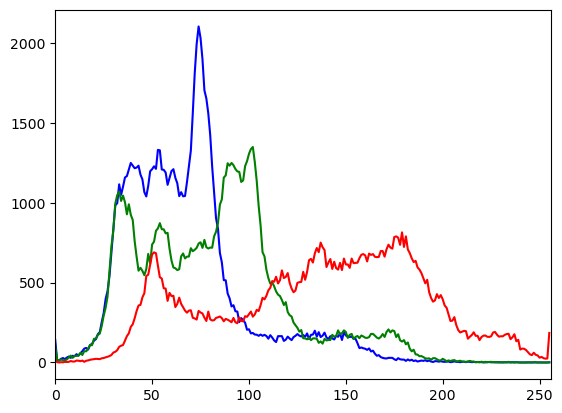

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

ML = cv2.imread('../Practice-Images/lena.jpg')
color = ('b','g','r')

for i, col in enumerate(color):
    hist = cv2.calcHist([ML],[i],None,[256],[0,256])
    plt.plot(hist,color = col)
    plt.xlim([0,256])

plt.show()

### Task 2:

1.	Load ‘lena.jpg’ as a grayscale image.
2.	Using OpenCV, perform histogram equalisation storing the result in a new array.
3.	Use numpy `hstack()` function to concatenate the original and equalised images.
4.	Display the concatenated image, the original histogram and the equalised histogram as in the sample below.
5.	Comment on the effects of equalisation.


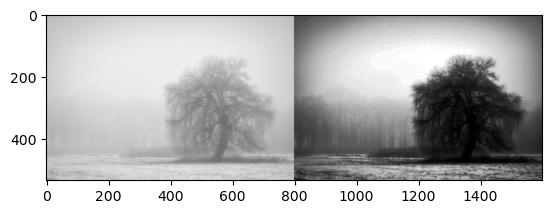

Image Histogram and equalised Image Histograms using matplotlib.hist


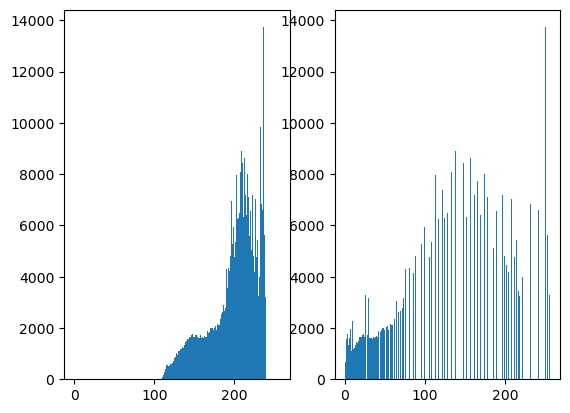

Image Histogram and equalised Image Histograms using cv2.calcHist


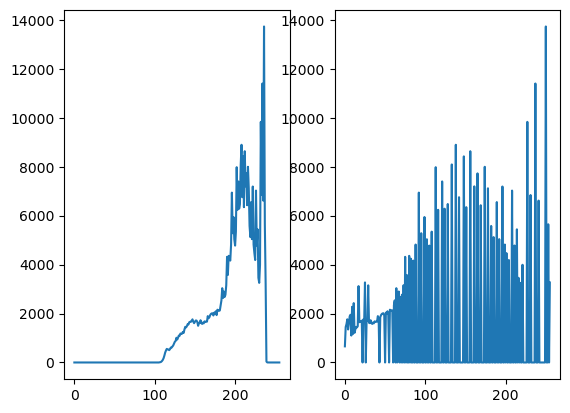

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Loading it into grayscale(ish)
MLC = cv2.imread('../Practice-Images/locontrast.jpg',0)
# Equalise hist
MLC_EQ = cv2.equalizeHist(MLC)
# Stacking images side by side
M_STACKED = np.hstack((MLC,MLC_EQ))
# Show input next to output
plt.imshow(M_STACKED, cmap='gray')
plt.show()

print('Image Histogram and equalised Image Histograms using matplotlib.hist')

fig,axs = plt.subplots(1,2)
axs[0].hist(MLC.ravel(),256,[0,256])
axs[1].hist(MLC_EQ.ravel(),256,[0,256])
plt.show()

print('Image Histogram and equalised Image Histograms using cv2.calcHist')

fig,axs = plt.subplots(1,2)

cv2HistOriginal = cv2.calcHist([MLC],[0],None,[256],[0,256])
cv2HistEqualised = cv2.calcHist([MLC_EQ],[0],None,[256],[0,256])

axs[0].plot(cv2HistOriginal)
axs[1].plot(cv2HistEqualised)
plt.show()


### Task 3:

Equalization attempted to produce a histogram with equal amounts of pixels in each intensity level.  This may result in unrealistic images when applied to RGB images.  While equalisation attempts to produce more equal amount of pixels for each intensity, normalization is simpler; it looks for the maximum intensity pixel and a minimum intensity and then will determine a factor that scales the min intensity to 0 and the max intensity to 255. This is applied to every pixel in the image which produces the final result.

Image Normalization is a process in which we change the range of pixel intensity values to make the image more familiar or normal to the senses, hence the term normalization. Often image normalization is used to increase contrast which aids in improved feature extraction or image segmentation.
1.	Load ‘locontrast.jpg’
2.	Use: cv2.normalize(my_img,  None, 0, 255, cv2.NORM_MINMAX)
3.	Use numpy hstack() function to concatenate the original and equalised images.
4.	Display the concatenated image, the original histogram and the equalised histogram as in the sample below.
5.	Comment on the effects of normalization and compare with equalization (TASK 2).


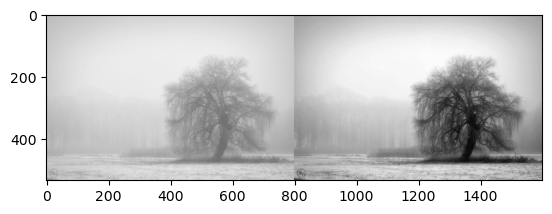

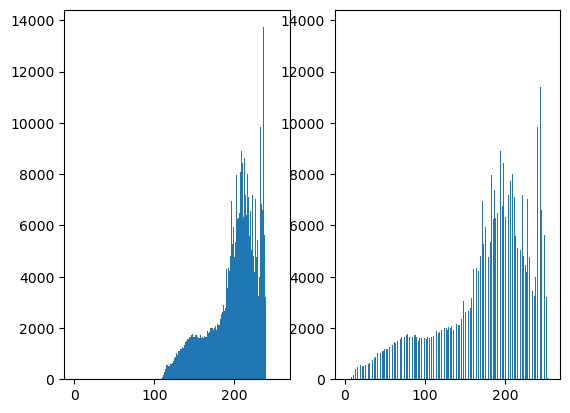

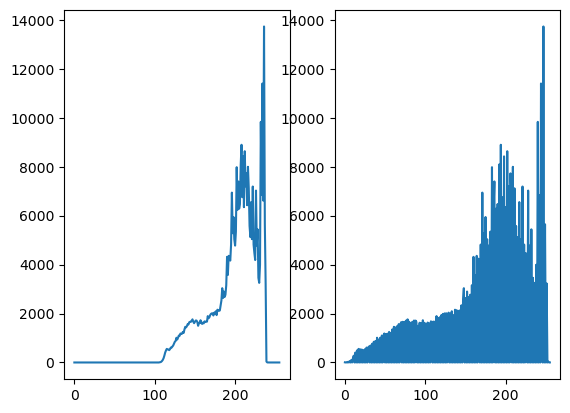

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

MLG = cv2.imread('../Practice-Images/locontrast.jpg',0)
MLG_N = cv2.normalize(MLG,None,0,255,cv2.NORM_MINMAX)

M_STACKED = np.hstack((MLG,MLG_N))
plt.imshow(M_STACKED, cmap='gray')
plt.show()

fig,axs = plt.subplots(1,2)
axs[0].hist(MLG.ravel(),256,[0,256])
axs[1].hist(MLG_N.ravel(),256,[0,256])
plt.show()

fig,axs = plt.subplots(1,2)

cv2HistOriginal = cv2.calcHist([MLG],[0],None,[256],[0,256])
cv2HistEqualised = cv2.calcHist([MLG_N],[0],None,[256],[0,256])

axs[0].plot(cv2HistOriginal)
axs[1].plot(cv2HistEqualised)
plt.show()